In [1]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [2]:
import numpy as np
import pandas as pd

data_path = './home-data-for-ml-course/'

train = pd.read_csv(data_path + 'train.csv') # 훈련 데이터
test = pd.read_csv(data_path + 'test.csv') # 테스트 데이터
submission = pd.read_csv(data_path + 'sample_Submission.csv') # 제출 샘플 데이터

In [3]:
train.shape , test.shape

((1460, 81), (1459, 80))

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.set_index('Id' , inplace =True)
test.set_index('Id' , inplace =True)

In [6]:
# 경진대회의 목적은 테스트 Set의 각 ID에 대해 SalePrice 변수의 값을 예측해야 한다.

# 예상값의 로그와 관찰된 판매 가격의 로그 사이의 RMSE(Root-Mean-Squared-Error)로 평가한다.

# ==> 로그를 취한다는 것은 비싼 집과 싼집을 예측하는 오류가 결과에 똑같이 영향을 미친다는 것을 의미한다.

In [7]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
set(train['SaleCondition'].tolist())

{'Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial'}

In [9]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [13]:
# test 와 train에는 결측값이 없다.

In [14]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 분포도

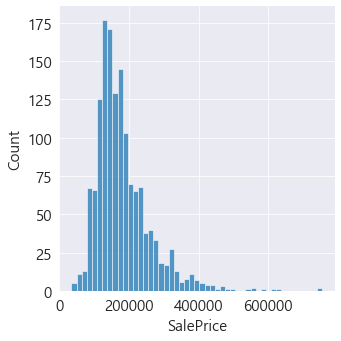

In [15]:
mpl.rc('font', size=  15) # 폰트 크기를 15로 설정
sns.displot(train['SalePrice']) # 분포도 출력

C:\Users\andyp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


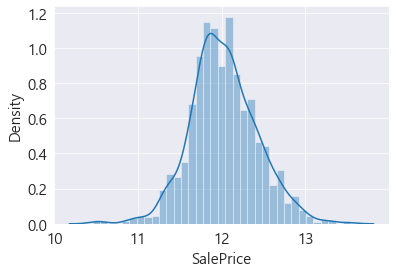

In [16]:
sns.distplot(np.log(train['SalePrice']))

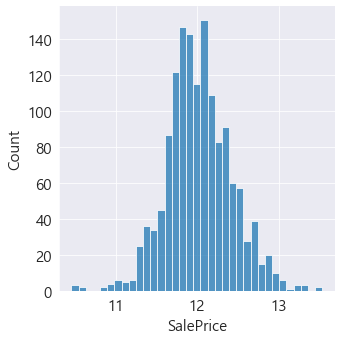

In [17]:
sns.displot(np.log(train['SalePrice']))

# 변환 전보다 정규분포에 가까워졌다. 타깃값 분포가 정규분포에 가까울 수록 회귀 모델 성능이 좋다.

# 피처를 바로 활용해 SalesPrice를 예측하는 것보다 log(SalesPrice)로 변환해 예측하는 편이 더 정확하다.

In [18]:
print(train.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

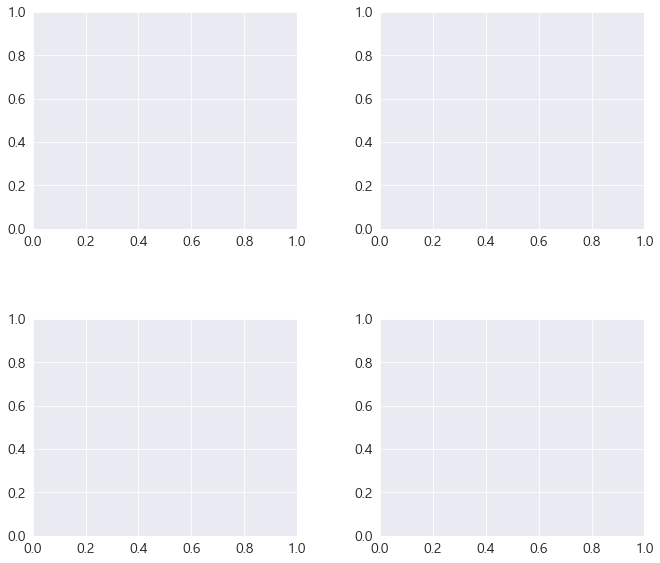

In [19]:
mpl.rc('font' , size = 14) # 폰트 크기 설정
mpl.rc('axes' , titlesize=15) # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=2, ncols=2) # 3행 2열 Figure 생성
plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(10,9) #전체 Figure 크기를 10x9인치로 설정

In [20]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5E71F8C40>,
      dtype=object)

Text(207.11818181818177, 0.5, '집값')

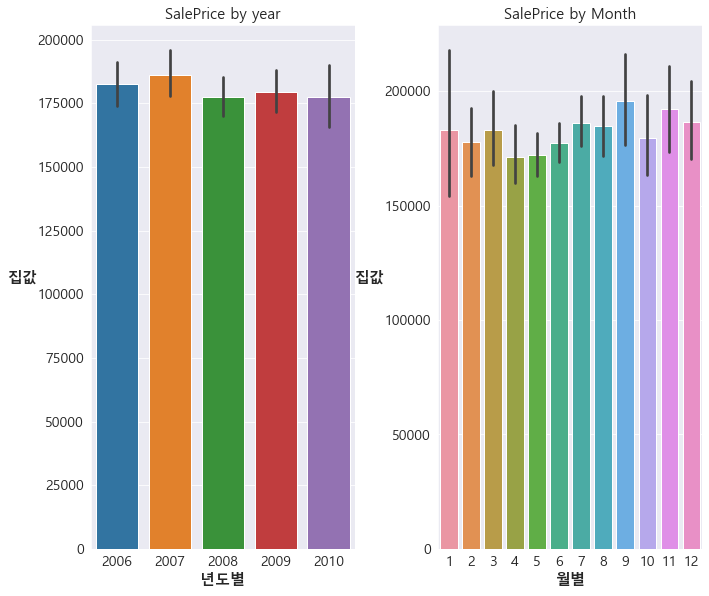

In [21]:
mpl.rc('font' , size = 14) # 폰트 크기 설정
mpl.rc('axes' , titlesize=15) # 각 축의 제목 크기 설정
figure, axes = plt.subplots(ncols=2) # 3행 2열 Figure 생성
plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(10,9) #전체 Figure 크기를 10x9인치로 설정

sns.barplot(x='YrSold' , y='SalePrice', data=train, ax=axes[0])
sns.barplot(x='MoSold' , y='SalePrice', data=train, ax=axes[1])


axes[0].set(title='SalePrice by year')
axes[1].set(title='SalePrice by Month')

axes[0].set_xlabel('년도별', fontsize = 15 , fontweight = 'bold')
axes[1].set_xlabel('월별', fontsize = 15 , fontweight = 'bold')
axes[0].set_ylabel('집값' , fontsize = 15 , fontweight = 'bold' , rotation = 0 , labelpad=15)
axes[1].set_ylabel('집값' , fontsize = 15 , fontweight = 'bold' , rotation = 0 , labelpad=15)

Text(207.11818181818177, 0.5, '집값')

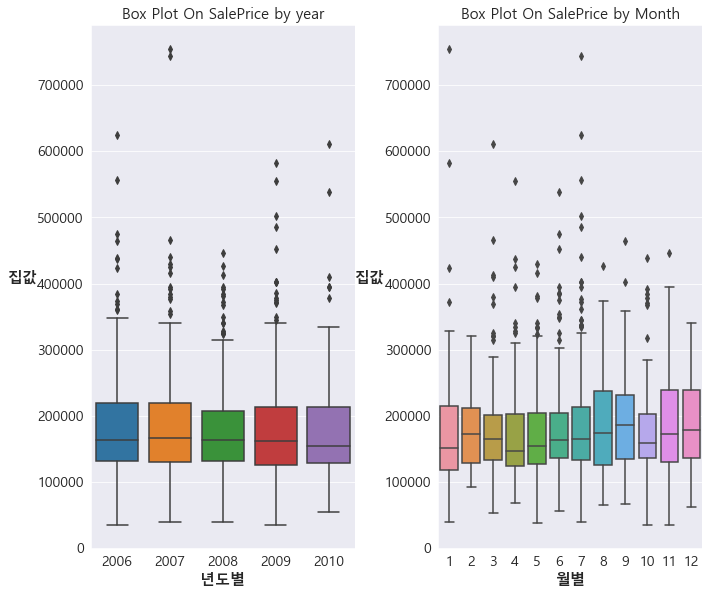

In [22]:
mpl.rc('font' , size = 14) # 폰트 크기 설정
mpl.rc('axes' , titlesize=15) # 각 축의 제목 크기 설정
figure, axes = plt.subplots(ncols=2) # 3행 2열 Figure 생성
plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(10,9) #전체 Figure 크기를 10x9인치로 설정

sns.boxplot(x='YrSold' , y='SalePrice', data=train, ax=axes[0])
sns.boxplot(x='MoSold' , y='SalePrice', data=train, ax=axes[1])


axes[0].set(title='Box Plot On SalePrice by year')
axes[1].set(title='Box Plot On SalePrice by Month')

axes[0].set_xlabel('년도별', fontsize = 15 , fontweight = 'bold')
axes[1].set_xlabel('월별', fontsize = 15 , fontweight = 'bold')
axes[0].set_ylabel('집값' , fontsize = 15 , fontweight = 'bold' , rotation = 0 , labelpad=15)
axes[1].set_ylabel('집값' , fontsize = 15 , fontweight = 'bold' , rotation = 0 , labelpad=15)

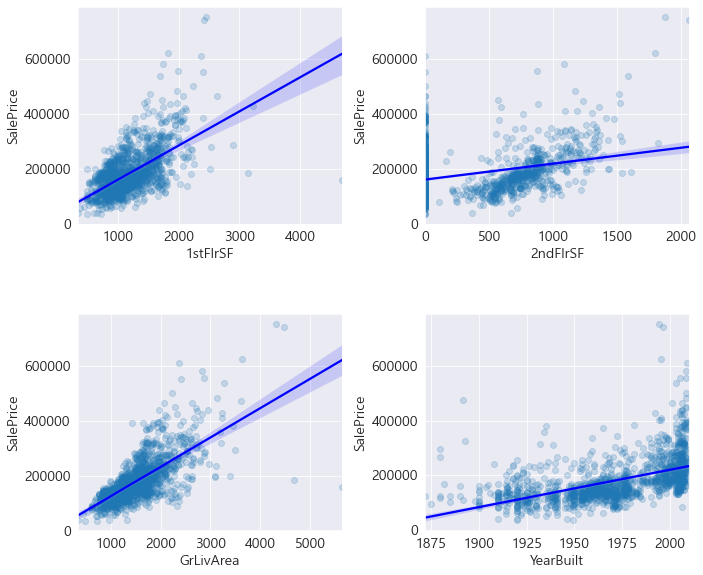

In [23]:
# 수치형 데이터

# 1stFlrSF : 1층 평방 피트

# 2ndFlrSF : 2층 평방 피트

# LowQualFinSF : 저품질 마감 평방 피트(모든 층)
# GrLivArea : 지상(지상) 거실 면적 평방피트
# BsmtFullBath : 지하 전체 욕실
# BsmtHalfBath : 지하 반 화장실
# FullBath : 지상 위의 전체 욕실
# HalfBath : 지상 반욕
# 침실 : 지하층 위의 침실 수
# 주방 : 주방 개수
# TotRmsAbvGrd : 지상 위의 총 객실 수(욕실 제외)
# 기능 : 홈 기능 등급
# 벽난로 : 벽난로 수
# FireplaceQu : 벽난로 품질

mpl.rc('font' , size = 14) # 폰트 크기 설정
mpl.rc('axes' , titlesize=15) # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=2,ncols=2) # 3행 2열 Figure 생성
plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(10,9) #전체 Figure 크기를 10x9인치로 설정

sns.regplot(x='1stFlrSF' , y='SalePrice' , data=train, ax=axes[0,0], scatter_kws={'alpha' : 0.2} , line_kws={'color': 'blue'})
sns.regplot(x='2ndFlrSF' , y='SalePrice' , data=train, ax=axes[0,1], scatter_kws={'alpha' : 0.2} , line_kws={'color': 'blue'})

sns.regplot(x='GrLivArea' , y='SalePrice' , data=train, ax=axes[1,0], scatter_kws={'alpha' : 0.2} , line_kws={'color': 'blue'})

sns.regplot(x='YearBuilt' , y='SalePrice' , data=train, ax=axes[1,1], scatter_kws={'alpha' : 0.2} , line_kws={'color': 'blue'})


# axes[0].set(title='Box Plot On SalePrice by year')
# axes[1].set(title='Box Plot On SalePrice by Month')

# axes[0].set_xlabel('년도별', fontsize = 15 , fontweight = 'bold')
# axes[1].set_xlabel('월별', fontsize = 15 , fontweight = 'bold')
# axes[0].set_ylabel('집값' , fontsize = 15 , fontweight = 'bold' , rotation = 0 , labelpad=15)
# axes[1].set_ylabel('집값' , fontsize = 15 , fontweight = 'bold' , rotation = 0 , labelpad=15)


In [24]:
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [25]:
numeric_cols = train.select_dtypes(include=['float', 'int64']).columns.tolist()
print(numeric_cols)
numeric_df = train[numeric_cols]

numeric_df

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


# 수치형 데이터의 상관관계

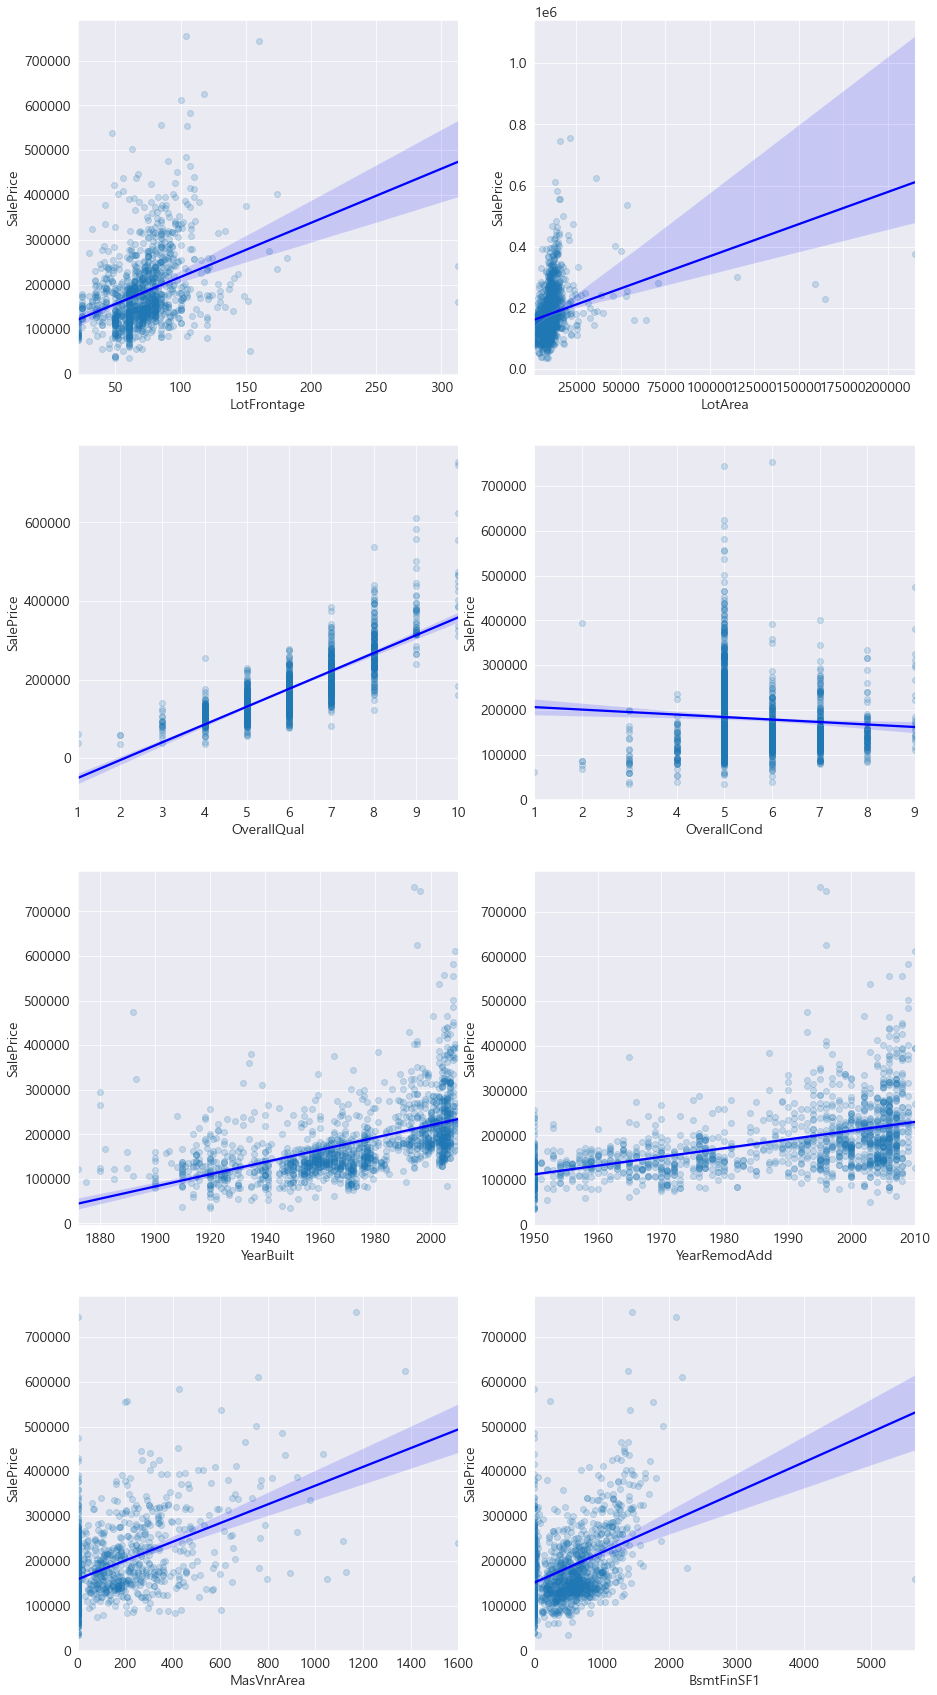

In [26]:
mpl.rc('font' , size = 14) # 폰트 크기 설정
mpl.rc('axes' , titlesize=15) # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=4,ncols=2) # 3행 2열 Figure 생성
# plt.subplots_adjust(wspace = 1, hspace = 1) #가로방향은 wspace , 세로방향은 hspace
# plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(15,30) #전체 Figure 크기를 10x9인치로 설정
idx = 1
for i in range(4):
    for j in range(2):
        sns.regplot(x=numeric_cols[idx] , y='SalePrice' , data=train, ax=axes[i,j], scatter_kws={'alpha' : 0.2} , line_kws={'color': 'blue'})
        idx+=1

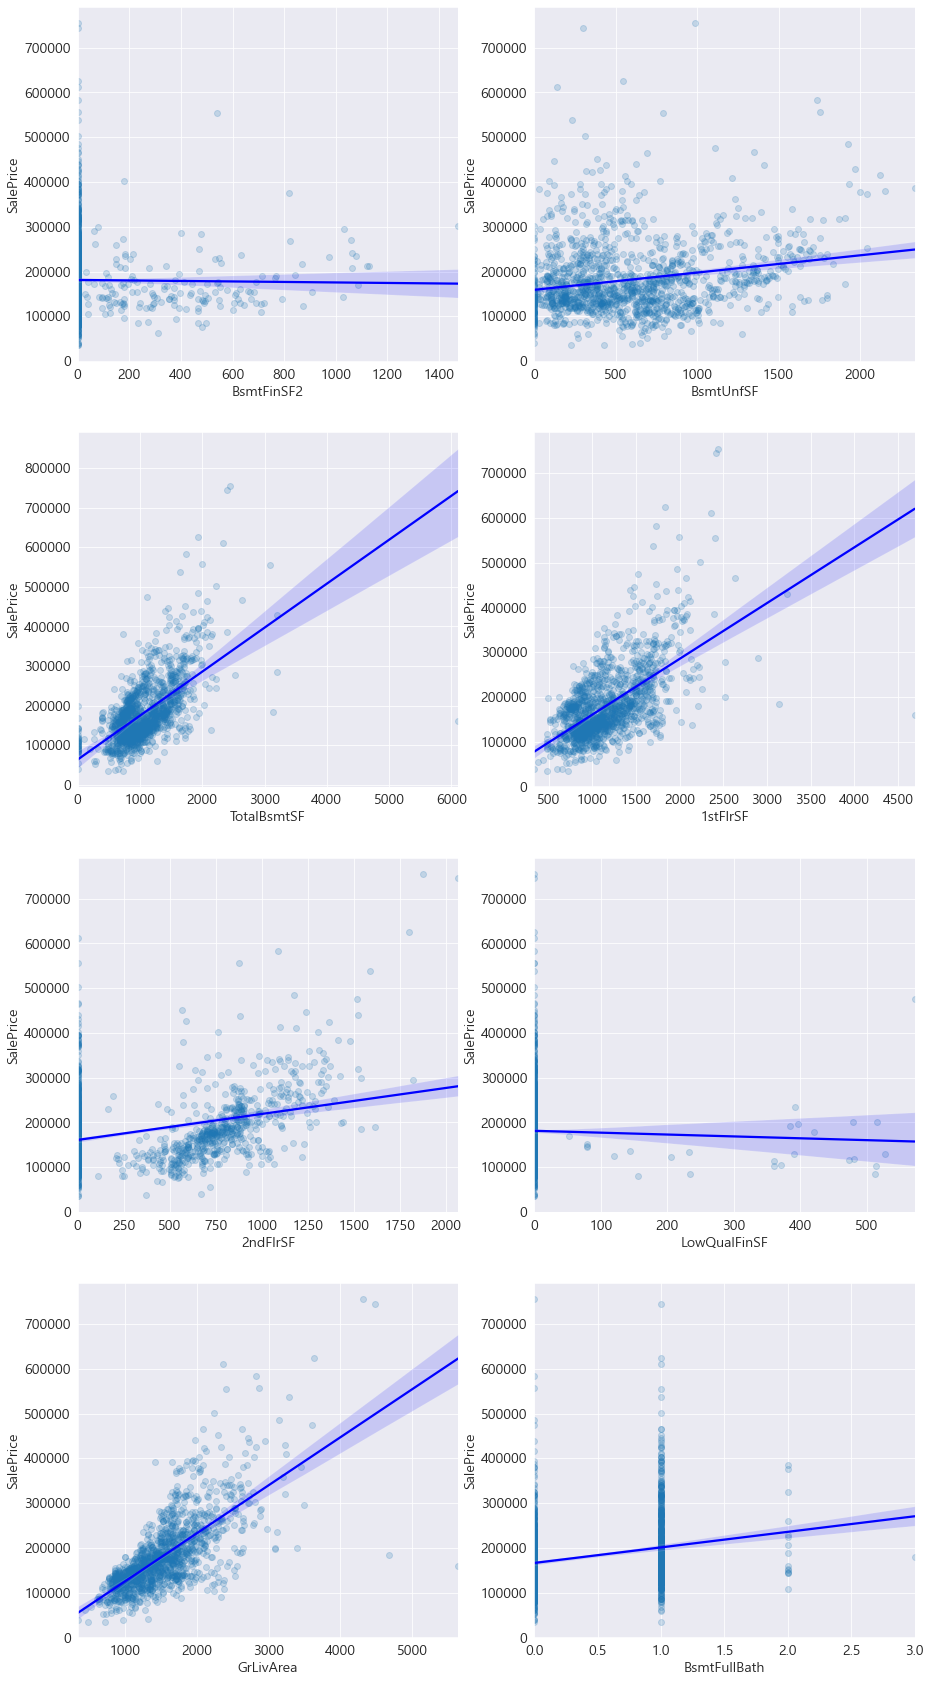

In [27]:
mpl.rc('font' , size = 14) # 폰트 크기 설정
mpl.rc('axes' , titlesize=15) # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=4,ncols=2) # 3행 2열 Figure 생성
# plt.subplots_adjust(wspace = 1, hspace = 1) #가로방향은 wspace , 세로방향은 hspace
# plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(15,30) #전체 Figure 크기를 10x9인치로 설정

for i in range(4):
    for j in range(2):
        sns.regplot(x=numeric_cols[idx] , y='SalePrice' , data=train, ax=axes[i,j], scatter_kws={'alpha' : 0.2} , line_kws={'color': 'blue'})
        idx+=1

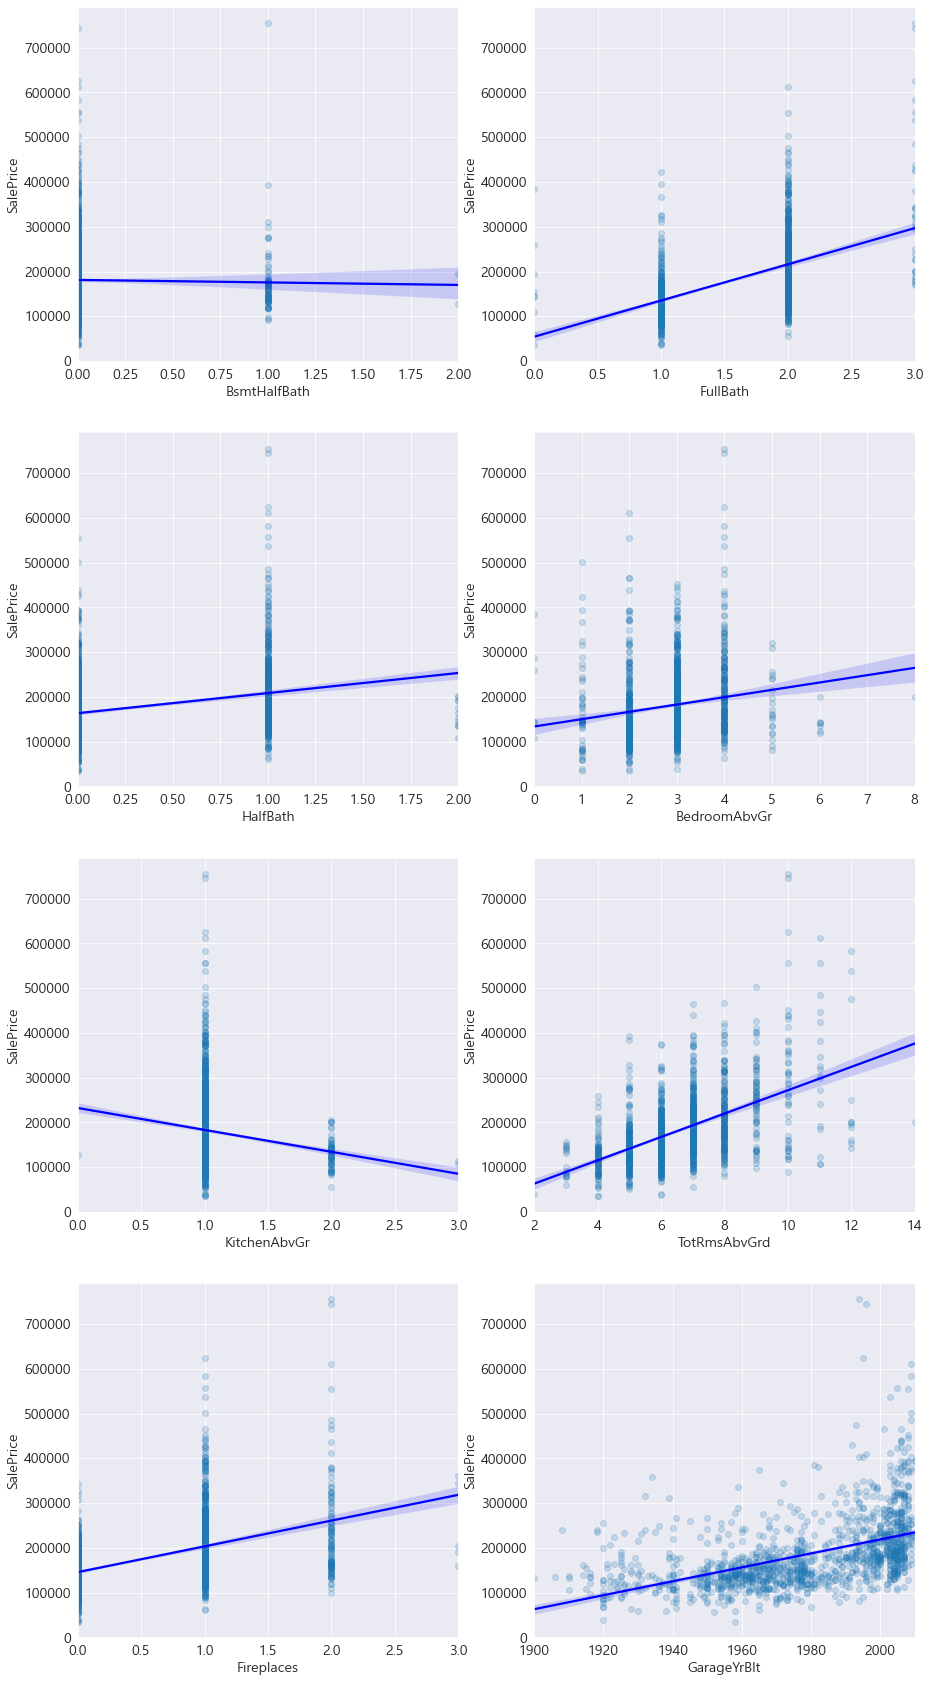

In [28]:
mpl.rc('font' , size = 14) # 폰트 크기 설정
mpl.rc('axes' , titlesize=15) # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=4,ncols=2) # 3행 2열 Figure 생성
# plt.subplots_adjust(wspace = 1, hspace = 1) #가로방향은 wspace , 세로방향은 hspace
# plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(15,30) #전체 Figure 크기를 10x9인치로 설정
for i in range(4):
    for j in range(2):
        sns.regplot(x=numeric_cols[idx] , y='SalePrice' , data=train, ax=axes[i,j], scatter_kws={'alpha' : 0.2} , line_kws={'color': 'blue'})
        idx+=1

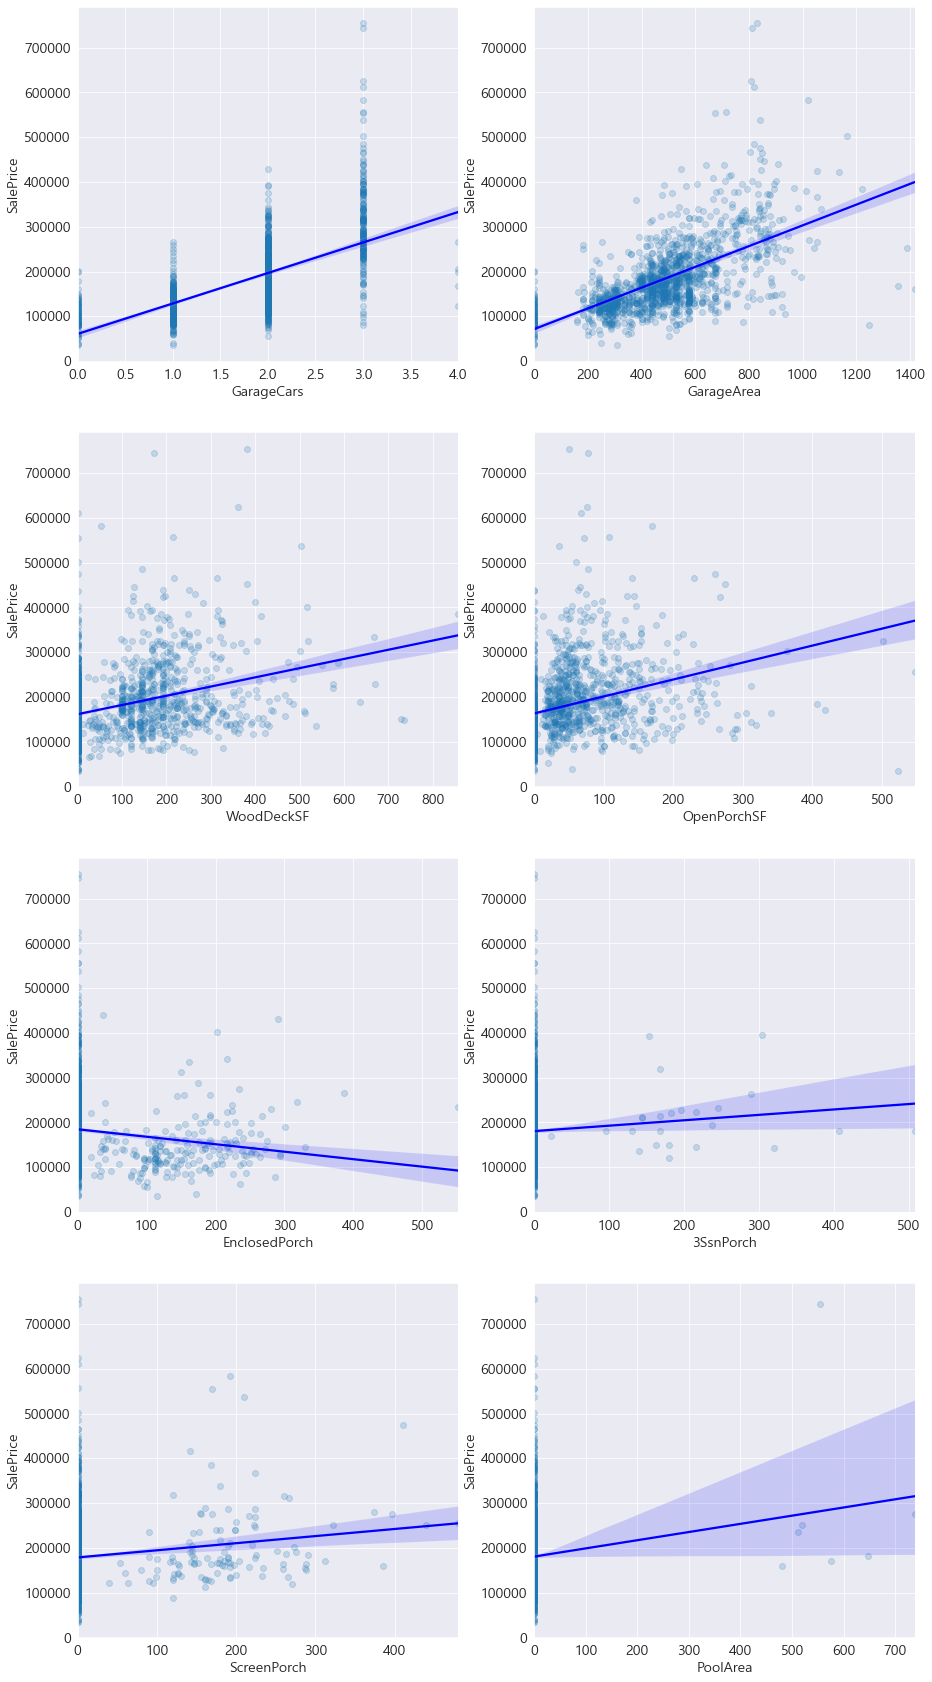

In [29]:
mpl.rc('font' , size = 14) # 폰트 크기 설정
mpl.rc('axes' , titlesize=15) # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=4,ncols=2) # 3행 2열 Figure 생성
# plt.subplots_adjust(wspace = 1, hspace = 1) #가로방향은 wspace , 세로방향은 hspace
# plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(15,30) #전체 Figure 크기를 10x9인치로 설정
for i in range(4):
    for j in range(2):
        sns.regplot(x=numeric_cols[idx] , y='SalePrice' , data=train, ax=axes[i,j], scatter_kws={'alpha' : 0.2} , line_kws={'color': 'blue'})
        idx+=1

In [30]:
# mpl.rc('font' , size = 14) # 폰트 크기 설정
# mpl.rc('axes' , titlesize=15) # 각 축의 제목 크기 설정
# figure, axes = plt.subplots(nrows=3,ncols=2) # 3행 2열 Figure 생성
# # plt.subplots_adjust(wspace = 1, hspace = 1) #가로방향은 wspace , 세로방향은 hspace
# # plt.tight_layout() # 그래프 사이에 여백 확보
# figure.set_size_inches(15,30) #전체 Figure 크기를 10x9인치로 설정
# for i in range(3):
#     for j in range(2):
#         sns.regplot(x=numeric_cols[idx] , y='SalePrice' , data=train, ax=axes[i,j], scatter_kws={'alpha' : 0.2} , line_kws={'color': 'blue'})
#         idx+=1

# 상관관계

In [31]:
corrMat = train[numeric_cols].corr()
corrMat

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

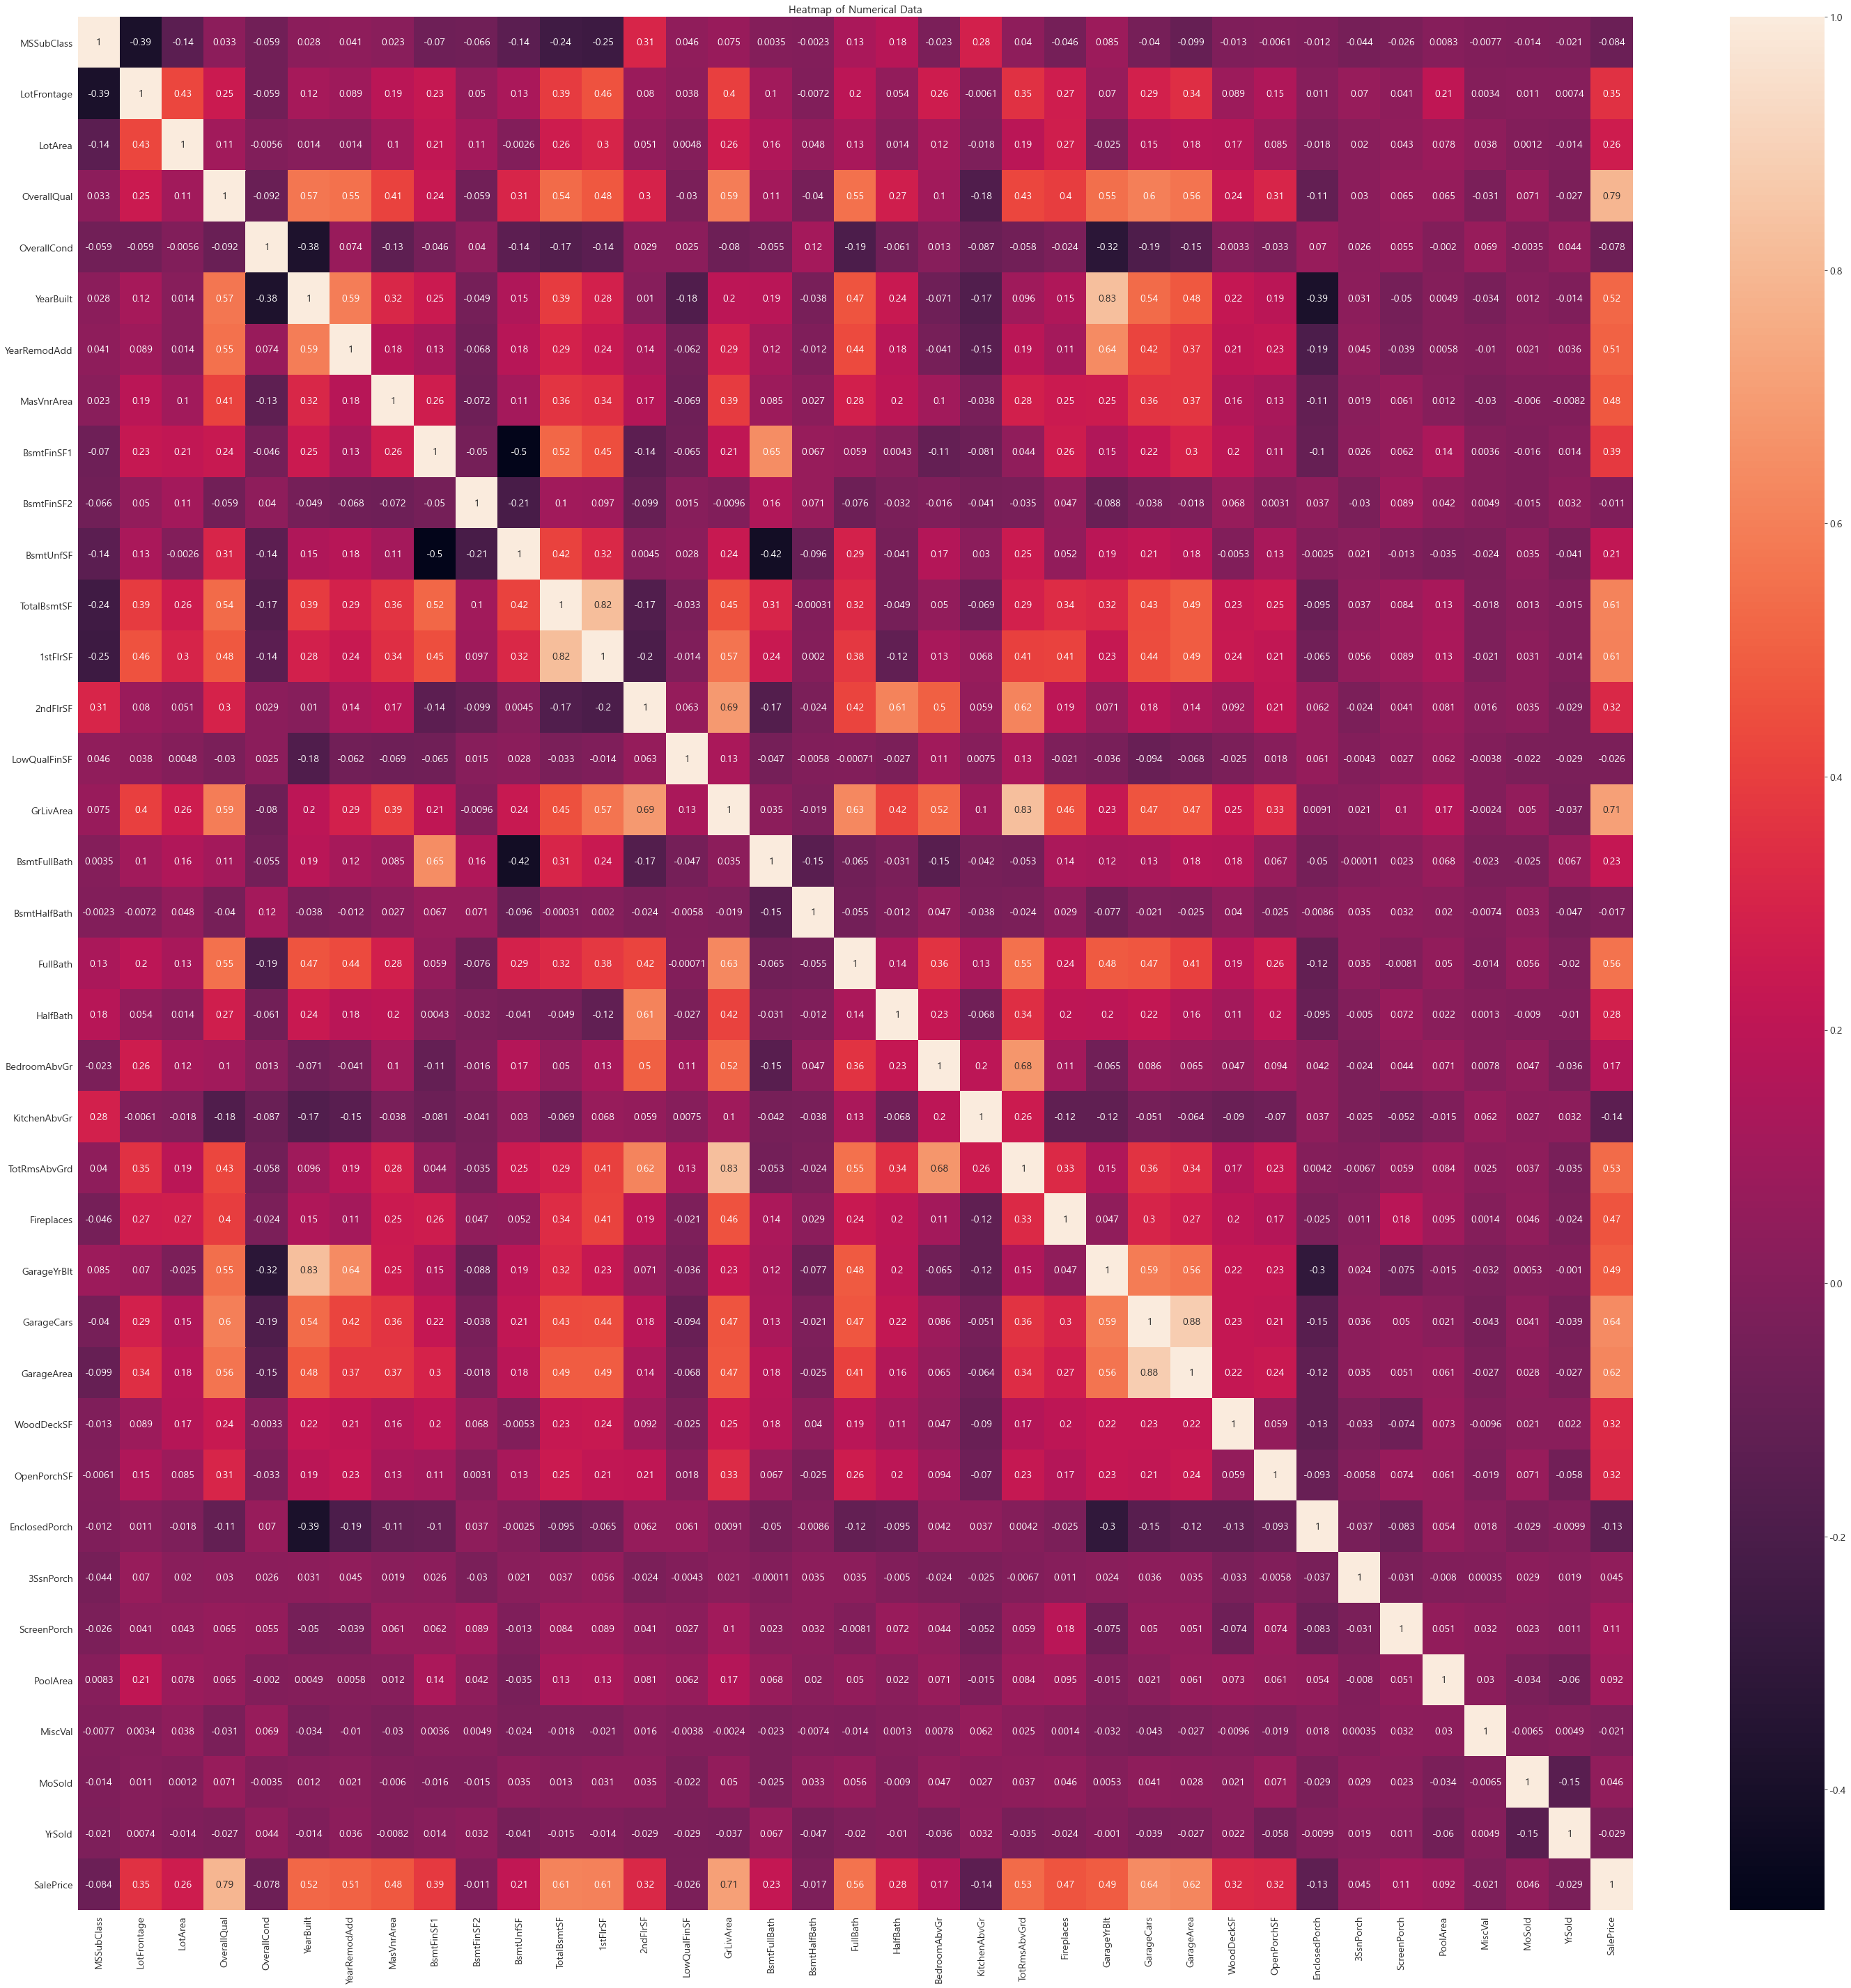

In [32]:
fig,ax = plt.subplots()
fig.set_size_inches(50,50)
sns.heatmap(corrMat , annot =True)
ax.set(title='Heatmap of Numerical Data')

In [33]:
features = corrMat[corrMat['SalePrice'].abs() >= 0.1].index.tolist()

# 상관관계가 0.1보다 작은 상관관계들 갖고온다.
corrMat = train[features].corr()
corrMat

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
LotFrontage,1.000000,0.426095,0.251646,0.123349,0.088866,0.193458,0.233633,0.132644,0.392075,0.457181,...,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.041383,0.351799
LotArea,0.426095,1.000000,0.105806,0.014228,0.013788,0.104160,0.214103,-0.002618,0.260833,0.299475,...,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.043160,0.263843
OverallQual,0.251646,0.105806,1.000000,0.572323,0.550684,0.411876,0.239666,0.308159,0.537808,0.476224,...,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.064886,0.790982
YearBuilt,0.123349,0.014228,0.572323,1.000000,0.592855,0.315707,0.249503,0.149040,0.391452,0.281986,...,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,-0.050364,0.522897
YearRemodAdd,0.088866,0.013788,0.550684,0.592855,1.000000,0.179618,0.128451,0.181133,0.291066,0.240379,...,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,-0.038740,0.507101
MasVnrArea,0.193458,0.104160,0.411876,0.315707,0.179618,1.000000,0.264736,0.114442,0.363936,0.344501,...,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.061466,0.477493
BsmtFinSF1,0.233633,0.214103,0.239666,0.249503,0.128451,0.264736,1.000000,-0.495251,0.522396,0.445863,...,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.062021,0.386420
BsmtUnfSF,0.132644,-0.002618,0.308159,0.149040,0.181133,0.114442,-0.495251,1.000000,0.415360,0.317987,...,0.250647,0.051575,0.190708,0.214175,0.183303,-0.005316,0.129005,-0.002538,-0.012579,0.214479
TotalBsmtSF,0.392075,0.260833,0.537808,0.391452,0.291066,0.363936,0.522396,0.415360,1.000000,0.819530,...,0.285573,0.339519,0.322445,0.434585,0.486665,0.232019,0.247264,-0.095478,0.084489,0.613581
1stFlrSF,0.457181,0.299475,0.476224,0.281986,0.240379,0.344501,0.445863,0.317987,0.819530,1.000000,...,0.409516,0.410531,0.233449,0.439317,0.489782,0.235459,0.211671,-0.065292,0.088758,0.605852


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [35]:
train = train[features].fillna(train.mean())
test = test[features[:-1]].fillna(train.mean())
# submission = submission.dropna(subset = features[:-1])

In [36]:
train[features].head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,8,0,2003.0,2,548,0,61,0,0,208500
2,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,6,1,1976.0,2,460,298,0,0,0,181500
3,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,6,1,2001.0,2,608,0,42,0,0,223500
4,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,7,1,1998.0,3,642,0,35,272,0,140000
5,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,9,1,2000.0,3,836,192,84,0,0,250000


In [37]:
test[features[:-1]].head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
Id,,,,,,,,,,,,,,,,,,,,,
1461,80.0,11622,5,1961,1961,0.0,468.0,270.0,882.0,896,...,1,5,0,1961.0,1.0,730.0,140,0,0,120
1462,81.0,14267,6,1958,1958,108.0,923.0,406.0,1329.0,1329,...,1,6,0,1958.0,1.0,312.0,393,36,0,0
1463,74.0,13830,5,1997,1998,0.0,791.0,137.0,928.0,928,...,1,6,1,1997.0,2.0,482.0,212,34,0,0
1464,78.0,9978,6,1998,1998,20.0,602.0,324.0,926.0,926,...,1,7,1,1998.0,2.0,470.0,360,36,0,0
1465,43.0,5005,8,1992,1992,0.0,263.0,1017.0,1280.0,1280,...,1,5,0,1992.0,2.0,506.0,0,82,0,144


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   YearBuilt      1460 non-null   int64  
 4   YearRemodAdd   1460 non-null   int64  
 5   MasVnrArea     1460 non-null   float64
 6   BsmtFinSF1     1460 non-null   int64  
 7   BsmtUnfSF      1460 non-null   int64  
 8   TotalBsmtSF    1460 non-null   int64  
 9   1stFlrSF       1460 non-null   int64  
 10  2ndFlrSF       1460 non-null   int64  
 11  GrLivArea      1460 non-null   int64  
 12  BsmtFullBath   1460 non-null   int64  
 13  FullBath       1460 non-null   int64  
 14  HalfBath       1460 non-null   int64  
 15  BedroomAbvGr   1460 non-null   int64  
 16  KitchenAbvGr   1460 non-null   int64  
 17  TotRmsAbvGrd   1460 non-null   int64  
 18  Fireplac

In [39]:
all_data = pd.concat([train,test])
all_data

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,2003,2003,196.0,706.0,150.0,856.0,856,...,8,0,2003.000000,2.0,548.0,0,61,0,0,208500.0
2,80.0,9600,6,1976,1976,0.0,978.0,284.0,1262.0,1262,...,6,1,1976.000000,2.0,460.0,298,0,0,0,181500.0
3,68.0,11250,7,2001,2002,162.0,486.0,434.0,920.0,920,...,6,1,2001.000000,2.0,608.0,0,42,0,0,223500.0
4,60.0,9550,7,1915,1970,0.0,216.0,540.0,756.0,961,...,7,1,1998.000000,3.0,642.0,0,35,272,0,140000.0
5,84.0,14260,8,2000,2000,350.0,655.0,490.0,1145.0,1145,...,9,1,2000.000000,3.0,836.0,192,84,0,0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1936,4,1970,1970,0.0,0.0,546.0,546.0,546,...,5,0,1978.506164,0.0,0.0,0,0,0,0,NaN
2916,21.0,1894,4,1970,1970,0.0,252.0,294.0,546.0,546,...,6,0,1970.000000,1.0,286.0,0,24,0,0,NaN
2917,160.0,20000,5,1960,1996,0.0,1224.0,0.0,1224.0,1224,...,7,1,1960.000000,2.0,576.0,474,0,0,0,NaN


In [40]:
all_data = all_data[features]
all_data

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,2003,2003,196.0,706.0,150.0,856.0,856,...,8,0,2003.000000,2.0,548.0,0,61,0,0,208500.0
2,80.0,9600,6,1976,1976,0.0,978.0,284.0,1262.0,1262,...,6,1,1976.000000,2.0,460.0,298,0,0,0,181500.0
3,68.0,11250,7,2001,2002,162.0,486.0,434.0,920.0,920,...,6,1,2001.000000,2.0,608.0,0,42,0,0,223500.0
4,60.0,9550,7,1915,1970,0.0,216.0,540.0,756.0,961,...,7,1,1998.000000,3.0,642.0,0,35,272,0,140000.0
5,84.0,14260,8,2000,2000,350.0,655.0,490.0,1145.0,1145,...,9,1,2000.000000,3.0,836.0,192,84,0,0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1936,4,1970,1970,0.0,0.0,546.0,546.0,546,...,5,0,1978.506164,0.0,0.0,0,0,0,0,NaN
2916,21.0,1894,4,1970,1970,0.0,252.0,294.0,546.0,546,...,6,0,1970.000000,1.0,286.0,0,24,0,0,NaN
2917,160.0,20000,5,1960,1996,0.0,1224.0,0.0,1224.0,1224,...,7,1,1960.000000,2.0,576.0,474,0,0,0,NaN


In [41]:
# all_data = all_data.dropna(subset=features[:-1])
# # all_data = pd.concat([all_data , idx] , ignore_index=True)
# all_data

In [42]:
# 훈련 데이터와 테스트 데이터 나누기

X_train = all_data[~pd.isnull(all_data['SalePrice'])]
X_test = all_data[pd.isnull(all_data['SalePrice'])]

# 타깃값 count 제거

X_train = X_train.drop(['SalePrice'], axis=1)
X_test = X_test.drop(['SalePrice'] ,axis =1)

y = train['SalePrice']

In [43]:
X_train.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,2003,2003,196.0,706.0,150.0,856.0,856,...,1,8,0,2003.0,2.0,548.0,0,61,0,0
2,80.0,9600,6,1976,1976,0.0,978.0,284.0,1262.0,1262,...,1,6,1,1976.0,2.0,460.0,298,0,0,0
3,68.0,11250,7,2001,2002,162.0,486.0,434.0,920.0,920,...,1,6,1,2001.0,2.0,608.0,0,42,0,0
4,60.0,9550,7,1915,1970,0.0,216.0,540.0,756.0,961,...,1,7,1,1998.0,3.0,642.0,0,35,272,0
5,84.0,14260,8,2000,2000,350.0,655.0,490.0,1145.0,1145,...,1,9,1,2000.0,3.0,836.0,192,84,0,0


In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   YearBuilt      1460 non-null   int64  
 4   YearRemodAdd   1460 non-null   int64  
 5   MasVnrArea     1460 non-null   float64
 6   BsmtFinSF1     1460 non-null   float64
 7   BsmtUnfSF      1460 non-null   float64
 8   TotalBsmtSF    1460 non-null   float64
 9   1stFlrSF       1460 non-null   int64  
 10  2ndFlrSF       1460 non-null   int64  
 11  GrLivArea      1460 non-null   int64  
 12  BsmtFullBath   1460 non-null   float64
 13  FullBath       1460 non-null   int64  
 14  HalfBath       1460 non-null   int64  
 15  BedroomAbvGr   1460 non-null   int64  
 16  KitchenAbvGr   1460 non-null   int64  
 17  TotRmsAbvGrd   1460 non-null   int64  
 18  Fireplac

In [45]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

log_y = np.log(y) # 타깃값 로그변환
linear_reg_model.fit(X_train, log_y) # 모델 훈련

LinearRegression()

In [46]:
preds = linear_reg_model.predict(X_train)
preds

array([12.255, 12.044, 12.275, ..., 12.251, 11.809, 11.894])

In [47]:
print(linear_reg_model.score(X_train,log_y))

0.8510169353257729


In [48]:
submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [49]:
linearreg_preds = linear_reg_model.predict(X_test)

linearreg_preds


array([11.683, 11.887, 12.054, ..., 12.097, 11.662, 12.387])

In [50]:
submission['SalePrice'] = np.exp(linearreg_preds)
submission
submission.to_csv('submission.csv' , index =False)

## 릿지 회귀 모델

---

L2 규제를 이용한 선형 회귀 모델 ==> 릿지 모델은 L2 규제를 사용하여, 모든 독립변수의 계수를 축소시킵니다. 따라서, 모든 변수를 사용하면서도, 계수의 크기를 작게 만들어, 다중공선성의 영향력을 줄일 수 있습니다. 이는 변수 선택이 어려운 상황에서도 유용하게 사용됩니다.

In [51]:
train

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,8,0,2003.0,2,548,0,61,0,0,208500
2,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,6,1,1976.0,2,460,298,0,0,0,181500
3,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,6,1,2001.0,2,608,0,42,0,0,223500
4,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,7,1,1998.0,3,642,0,35,272,0,140000
5,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,9,1,2000.0,3,836,192,84,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,7917,6,1999,2000,0.0,0,953,953,953,...,7,1,1999.0,2,460,0,40,0,0,175000
1457,85.0,13175,6,1978,1988,119.0,790,589,1542,2073,...,7,2,1978.0,2,500,349,0,0,0,210000
1458,66.0,9042,7,1941,2006,0.0,275,877,1152,1188,...,9,2,1941.0,1,252,0,60,0,0,266500


### 하이퍼파라미터 최적화(모델 훈련)

- 그리드서치 ==> 하이퍼파라미터를 격자 처럼 촘촘하게 순회하며 최적의 하이퍼파라미터 값을 찾는 기법이다.

- 각 하이퍼파라미터를 적용한 모델마다 교차 검증하며 성능을 측정하여 최종적으로 성능이 가장 좋았을 때의 하이퍼파라미터 값을 찾아준다.

---

In [52]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

In [53]:
import numpy as np

def rmsle(y_true , y_pred , convertExp = True):
    # 지수 변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)

    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true +1))
    log_pred = np.nan_to_num(np.log(y_pred+1))


    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

### 그리드서치 객체 생성

- 그리드서치는 하이퍼파라미터의 값을 바꿔가며 '모델'의 성능을 교차검증으로 '평가'해 최적의 하이퍼파라미터 값을 찾아준다.


- 비교 검증해볼 하이퍼파라미터 값 목록

- 대상 모델

- 교차 검증용 평가 수단(평가 함수)

In [54]:
# 하이퍼파라미터 값 목록

ridge_params = {'max_iter' : [3000] , 'alpha' : [0.1,1,2,3,4,10,30,100,200,300,400,800,900,1000]}

# alpha 값이 클수록 규제 강도가 세진다.

# 교차 검증용 평가 함수(RMSLE 점수 계산)
rmsle_scorer = metrics.make_scorer(rmsle , greater_is_better=False)


gridsearch_ridge_model = GridSearchCV(estimator= ridge_model, # 릿지 모델
                                      param_grid= ridge_params, # 값 목록
                                      scoring= rmsle_scorer ,  # 평가지표,
                                      cv = 5 ) # 교차검증 분할 수

## 그리드서치 수행

In [55]:
log_y = np.log(y) # 타깃값 로그변환

gridsearch_ridge_model.fit(X_train , log_y) # 훈련(그리드서치)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [56]:
print('최적 하이퍼파라미터 :' , gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 10, 'max_iter': 3000}


In [57]:
# 예측

preds = gridsearch_ridge_model.best_estimator_.predict(X_train)

# 평가

print(f'릿지 회귀 RMSLE 값 : {rmsle(log_y , preds , True) :.4f}')

ridge_model_preds = gridsearch_ridge_model.predict(X_test)
print(linear_reg_model.score(X_train,preds))

ridge_model_preds

릿지 회귀 RMSLE 값 : 0.1542
0.999884231487146


array([11.69 , 11.889, 12.056, ..., 12.098, 11.666, 12.385])

In [58]:
gridsearch_ridge_model

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [59]:
submission['SalePrice'] = np.exp(ridge_model_preds)

submission.to_csv('submission2.csv' , index =False)
submission

,Id,SalePrice
0,1461,119365.459276
1,1462,145627.864792
2,1463,172063.525865
3,1464,192463.368623
4,1465,195010.251600
...,...,...
1454,2915,90428.384594
1455,2916,101627.742376
1456,2917,179515.994522
1457,2918,116593.520779


## 라쏘 회귀 모델

- L1 규제 적용한 선형 회귀 모델
- 릿지 회귀 모델과 마찬가지로 성능이 좋은 편이 아니다.

In [60]:
from sklearn.linear_model import Lasso

# 모델 생성
lasso_model = Lasso()

# 하이파라미터 값 목록

lasso_alpha = 1/np.array([0.1 , 1, 2, 3, 4, 10 ,30 , 100, 200 , 300 , 400, 800, 900, 1000])

lasso_params = {'max_iter' : [3000] , 'alpha' : lasso_alpha}

# 그리드서치(with 라쏘) 객체 생성
gridsearch_lasso_model = GridSearchCV(estimator= lasso_model ,
                                      param_grid = lasso_params,
                                      scoring = rmsle_scorer,
                                      cv = 5)

# 그리드서치 수행

log_y = np.log(y)
gridsearch_lasso_model.fit(X_train , log_y)

print('최적 하이퍼파라미터 :' , gridsearch_lasso_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.001, 'max_iter': 3000}


## 성능 검증

In [61]:
# 예측
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)

# 평가
print(f'라쏘 회귀 RMSLE 값 : {rmsle(log_y , preds , True):.4f}')

print(gridsearch_ridge_model.score(X_train,preds))
print(linear_reg_model.score(X_train, preds))
ridge_model_preds = gridsearch_ridge_model.predict(X_test)
ridge_model_preds

라쏘 회귀 RMSLE 값 : 0.1544
-0.005585039518287157
0.999413336285694


array([11.69 , 11.889, 12.056, ..., 12.098, 11.666, 12.385])

In [62]:
submission['SalePrice'] = np.exp(ridge_model_preds)

submission.to_csv('submission3.csv' , index =False)
submission

,Id,SalePrice
0,1461,119365.459276
1,1462,145627.864792
2,1463,172063.525865
3,1464,192463.368623
4,1465,195010.251600
...,...,...
1454,2915,90428.384594
1455,2916,101627.742376
1456,2917,179515.994522
1457,2918,116593.520779


## 랜덤 포레스트 회귀 모델

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 모델 생성
randomforest_model = RandomForestRegressor()

# 그리드서치 객체 생성
rf_params = {'random_state':[123, 369, 1004], 'n_estimators':[150, 250, 500, 1000],
             'max_depth':[5, 10, 15, 20, 30], 'max_features':["auto", "sqrt", "log2"]}
grid_rf_model = GridSearchCV(estimator=randomforest_model, param_grid=rf_params, scoring='r2', cv=5)
log_y = np.log(y) # y= X_train['SalesPrice']
grid_rf_model.fit(X_train, log_y)
print(grid_rf_model.best_params_)

In [ ]:
# 예측

preds = grid_rf_model.best_estimator_.predict(X_train)

# 평가

print(f'랜덤포레스트 RMSLE 값 : {rmsle(log_y , preds , True) :.4f}')

grid_rf_model_preds = grid_rf_model.predict(X_test)
print(linear_reg_model.score(X_train,preds))

grid_rf_model_preds

In [ ]:
submission['SalePrice'] = np.exp(grid_rf_model_preds)

submission.to_csv('submission4.csv' , index =False)
submission